Gestion des IDs de Intact
Travail sur un subset (head 200)
> /home/lbarlet/WorkOnIntact/subset_intact.txt

split pour récup deux première colonnes 
ensuite trie pour savoir quelle ID est la plus présentes,
la seconde, ...

/!\ la deuxième ne doit pas présenter la première, etc /!\


In [1]:
import sys
import os
import subprocess
sys.path.append('/Users/jmartin/omegaLoMo/lib/')
import core as ca
import createTopo as cT
import graph as graph
import smallWork as sW
%load_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from collections import Counter
from collections import defaultdict
import fnmatch
import networkx as nx
import matplotlib.pyplot as plt
import copy
import collections
import numpy as np
import operator
import json
import math
%autoreload 2

* MITAB_file and filterIds can be filled when reading serialized data, or read from scratch, using input files.
* MITAB_file contains IntAct informations, restricted to physical interactions. 
It is a subset of the informations
from /mobi/group/divisome/physical_intact.mitab.txt, after serialization by an external python script.
* filterIds contains information about S pneumoniae
* intactR6filtered_topology is a dictionary, with pairs of UniProt Ids of proteins from IntAct interactions, that match with R6 sequences,
non redundant.

In [3]:
%autoreload 2
# Creating an IntAct topolgy dictionary from scratch
# all physical interactions from IntAct: 348,806 interactions 
MITAB_file="/Volumes/arwen/mobi/group/divisome/physical_intact.mitab.txt"
# a subset of 20,000 interactions 
MITAB_file="/Volumes/arwen/mobi/group/divisome/physical_intact.mitab_20000.txt"
filterIds="/Volumes/arwen/mobi/group/divisome/anaBlast/allInR6Test2"

# same, but sourcing from the directory generated by JM
MITAB_file="/Volumes/arwen/mobi/group/divisome/2017_10_04_DUPLICATE_RESULTS/INTACT_VERSUS_R6R/physical_intact.mitab_20000.txt"
# So far, we only parse the IntAct ids, not the R6 info
filterIds="/Volumes/arwen/mobi/group/divisome/2017_10_04_DUPLICATE_RESULTS/POST_PROCESS_INTACT_VERSUS_R6R/allHitsInR6.txt"
# 

# create Topolgy object
topo = cT.Topology()
# parse MITAB file
topo.parseIntactMitab(MITAB_file)
# filter the IntAct interactions, to remove protein Ids with no match with R6
topo.filterWith(filterIds)

# Create an IntAct topology from object deserialisation
# topo.deserialize('/serializedData/newDic.json')

# this step, with the complete MITAB_file physical_intact.mitab.txt, takes
# about 40 minutes 
intactR6filtered_topology=topo.newDic

print intactR6filtered_topology

# OK 

Number of intact uniprotID w/ R6 homologs 25510
{'Q12411': ['Q12411', 'Q08550', 'P32336', 'P36094', 'P53865', 'Q08550', 'P32336'], 'O54874': ['Q92614', 'Q7TT49'], 'Q7VL96': ['Q7VL96'], 'P33934': ['P33934'], 'Q9A8N4': ['P0CAV8', 'P0CAV8', 'Q9A8N4', 'Q9A8N4', 'Q9A8N4', 'P0CAV8', 'P0CAV8', 'Q9A8N4', 'Q9A8N4'], 'Q9VD65': ['Q2XYK6', 'P61209'], 'P12904': ['P06782', 'Q84VQ1', 'Q9SCY5'], 'A8BB40': ['A8BB40', 'A8BB35', 'A8BB35', 'A4JYD4', 'A4JYD4', 'A8BB30', 'A8BAV6', 'A8BB30', 'A8BAV6', 'B8JKM0'], 'Q8LBP4': ['Q38885', 'Q8LBP4', 'Q38885', 'P40350', 'P56761', 'P56760', 'Q38885', 'Q38885', 'Q38885', 'Q38885', 'Q38885'], 'Q0E924': ['Q27580', 'Q9Y171', 'P91938'], 'P52612': ['P52612'], 'P14599': ['P34082', 'Q9GQQ6', 'P34082'], 'Q38885': ['Q38885', 'P40350'], 'P63012': ['Q62739'], 'Q13153': ['P63001', 'P60766'], 'P55072': ['Q9UNN5', 'Q92575', 'Q9BZE9'], 'A8BB75': ['A8BBJ6', 'A8BBJ6', 'A8BBB4'], 'Q05931': ['P38523'], 'Q8BGY9': ['P51693'], 'P43291': ['Q570C0', 'Q9SKK0', 'Q708Y0'], 'Q03020': ['P53193', 

## File format of /mobi/group/divisome/anaBlast/allInR6Test2
** File content: **
Q6A162\n

Q8DRI0:74,316,76,31,1.63488e-07

Q8DPJ9:233,491,101,47,8.67392e-07

Q8DN05:124,460,108,32,0.0420328   

** Explanation **

Means that the IntAct UniprotId Q6A162 has 3 hits in the R6 proteome: Q8DRI0, Q8DPJ9, and Q8DN05. 
    Informations after the ":" 
    are the alignment statistics : Hsp_hit-from, Hsp_hit-to, Hsp_positive, Hsp_identity, Hsp_evalue
    /mobi/group/divisome/UsineBlastArrayIntact_vs_R6/IntactVsR6/swork/Q6/Q6A162/logs

** Native BLAST results **
They are stored here :
/mobi/group/divisome/UsineBlastArrayIntact_vs_R6/IntactVsR6/swork/
        
The folder organization is such that for the IntAct sequence Q6A162 :
/mobi/group/divisome/UsineBlastArrayIntact_vs_R6/IntactVsR6/swork/Q6/Q6A162/logs
    
** Generation of BLAST results **

See /mobi/group/divisome/UsineBlastArrayIntact_vs_R6/main_array.sh
and /mobi/group/divisome/UsineBlastArrayIntact_vs_R6/job4one.sh



In [ ]:
# C'est ici que ça se gâte.... 

from datetime import datetime
str(datetime.now())

# From scratch, omegaSet object construction
# From Loic's files 
# indexR6 = '/Volumes/arwen/mobi/group/divisome/serializedData/indexR6'
# blastResults='/Volumes/arwen/mobi/group/divisome/UsineBlastArrayIntact_vs_R6/IntactVsR6/swork/'

# from files in the DUPLICATE directory
indexR6 = '/Volumes/arwen/mobi/group/divisome/2017_10_04_DUPLICATE_RESULTS/POST_PROCESS_INTACT_VERSUS_R6R/R6_index.txt'
# directory with json files 
blastResults='/Volumes/arwen/mobi/group/divisome/2017_10_04_DUPLICATE_RESULTS/POST_PROCESS_INTACT_VERSUS_R6R/OUTPUT/'
# a subset of the blast results, with 558 json files 
# blastResults='/Volumes/arwen/mobi/group/divisome/2017_10_04_DUPLICATE_RESULTS/POST_PROCESS_INTACT_VERSUS_R6R/OUTPUT_SUBSET/'

# Creation of omegaSet from scratch
omegaSet=ca.HomegaSet(queryIdList=indexR6,path=blastResults)

# Creation of omegaSet by deserialization
# omegaSet = ca.HomegaSet(bean='/Volumes/arwen/mobi/group/divisome/FullOmegaSet_coverage.json', queryIdList=indexR6)
print omegaSet

# après avoir mouliné toute une journée, j'ai btenu au final un objet vide...
# donc au final je crois que ca.HomegaSet ne parse pas les fichiers
# .json, mais des fichiers blast.out...
# les fichiers .out se trouvent dans Volumes/arwen/mobi/group/divisome/2017_10_04_DUPLICATE_RESULTS/INTACT_VERSUS_R6R/BLAST_OUTPUT
# Au cas où il y aurait nécessité de mettre les .json et les blast.out 
# dans la même arborescence, l'option cp --parents s'avère très pratique
# (mais prévoir d'aller prendre un café pendant que ça copie....)

str(datetime.now())


## Description of omegaSet ##

OmegaSet is a list of objects omegaVectors objects.
    
** Description of the omegaVector object **

* a dictionary with a key "template ID", value= a UniprotId from IntAct,
    * a key "Pairs Data", value= list of dictionnaries 
        * "query" : R6 Ids
        * "param" : list of HSP statistics
        * "template" : the template Id (identical to template ID)
            
** FullOmegaSet_coverage.json **
a serialized file with all HSP statistics, for all IntAct proteins.
Hence, we need to use the argument queryIdList=indexR6, to filter out HSPs that do not belong to R6.
    
** Generation of indexR6 and FullOmegaSet_coverage.json **
* indexR6: a simple list of Uniprot Ids from the R6 proteome
    
    head  /Volumes/arwen/mobi/group/divisome/serializedData/indexR6
sp|P0A2U7|ADCC|STRR6.seq
sp|P0A2U9|AMIE|STRR6.seq
sp|P0A2V9|PSTB3|STRR6.seq
sp|P0A2W1|ACP|STRR6.seq
sp|P0A2W7|ACPS|STRR6.seq
sp|P0A2W9|ALR|STRR6.seq
sp|P0A2X4|EXOA|STRR6.seq
sp|P0A2Y3|ARGR|STRR6.seq
sp|P0A2Y7|AROC|STRR6.seq
sp|P0A2Y9|ATP6|STRR6.seq

* FullOmegaSet_coverage.json   



In [22]:
# connect omegaVector Objects
omegaMatrix = ca.OmegaMatrix(topo = intactR6filtered_topology, omegaSet = omegaSet)
omegaMatrix.reduceAndVectorInject()
# build the adjacency matrix in R6
queryTopo = omegaMatrix.project()
#print queryTopo.queryTopo


# list of predicted interactions in R6. 
# each R6 interaction (= pair of nodes) is associated with 1 (or more)
# IntAct pairs, and their
# homology relationships are characterized by HSP statistics
# of course (!!) one predicted pair can be supported by several IntAct pairs



QT
{<core.Node object at 0x1150d5050>: {<core.Node object at 0x1150d5150>: [{'loQueryParam': [u'232', u'1036', u'221', u'88', u'6.5425e-08', u'1060', u'215', u'990', u'1179'], 'hiQueryParam': [u'133', u'1014', u'241', u'86', u'2.18206e-08', u'1083', u'178', u'1073', u'1179']}], <core.Node object at 0x1150d5c90>: [{'loQueryParam': [u'232', u'1036', u'221', u'88', u'6.5425e-08', u'1060', u'215', u'990', u'1179'], 'hiQueryParam': [u'64', u'282', u'87', u'32', u'0.0104892', u'1083', u'866', u'1083', u'619']}, {'loQueryParam': [u'133', u'1014', u'241', u'86', u'2.18206e-08', u'1083', u'178', u'1073', u'1179'], 'hiQueryParam': [u'30', u'319', u'103', u'34', u'0.00465376', u'1060', u'765', u'1055', u'619']}], <core.Node object at 0x1150d5590>: [{'loQueryParam': [u'133', u'1014', u'241', u'86', u'2.18206e-08', u'1083', u'178', u'1073', u'1179'], 'hiQueryParam': [u'735', u'857', u'41', u'13', u'7.74861', u'1060', u'928', u'1050', u'1084']}]}, <core.Node object at 0x1150d5b90>: {<core.Node objec

## Graphs Functions

In [26]:
interactome = graph.Interactome(queryTopo)
init = interactome.drawGraph()

In [24]:
# probably useless, according to Loïc

uniqueP = set()
setToSend = set()
for query in init.edge:
        uniqueP.add(query)
        for neighboor, param in init.edge[query].iteritems():
            uniqueP.add(neighboor)
for i in uniqueP:
    setToSend.add(str(i.query))

In [20]:
# probably useless, according to Loïc
resset = set()
R6BB = "/Users/lbarlet/arwen/mobi/group/divisome/anaBlast/allInR6Test2"
with open (R6BB, 'r') as workfile:
    for line in workfile:
        if ":" in line :
            sLine = line.split(":")
            resset.add(sLine[0])

In [29]:
len(resset - setToSend)

NameError: name 'resset' is not defined

In [37]:
divisome = sW.Divisome()
onlyId = divisome.getDivisomeID('/Users/jmartin/omegaLoMo/serializedData/divKnownR6.txt')
print onlyId

['Q8CWP9', 'Q8DQM0', 'P64073', 'Q8DQE5', 'P64167', 'Q8DR70', 'Q8DR57', 'Q8DNE8', 'Q8DNI9', 'Q9EUQ7', 'Q8DNS0', 'Q8DR29', 'Q7ZAK7', 'Q8DR55', 'Q8DPV4', 'Q8DP40', 'Q8DR69', 'Q8CWQ5', 'Q8DQM2', 'Q8DQM1', 'P65467', 'P59676', 'Q8DPW6', 'Q8DQH3', 'Q8DNV6', 'Q8DQH4', 'Q8DNV8', 'Q8DQE8', 'Q8CZ65', 'Q8DPK2', 'Q8DNV9']


In [39]:
# Alternative to onlyId
divR6Known = '/Volumes/arwen/mobi/group/divisome/DivAlreadyKnow_litt_massida.txt'
onlyId_massida = set()
with open (divR6Known, 'r') as file_div:
    for i in xrange(1):
        file_div.next()
    for line in file_div:
        #print line
        sLine = line.split("\t")
        onlyId_massida.add(sLine[0])

In [32]:
divR6Known = '/Volumes/arwen/mobi/group/divisome/DivAlreadyKnow_litt_phino.txt'
onlyId_phino = set()
with open (divR6Known, 'r') as file_div:
    for i in xrange(1):
        file_div.next()
    for line in file_div:
        #print line
        sLine = line.split("\t")
        onlyId_phino.add(sLine[0])

In [33]:
print len(onlyId_massida)
print onlyId_phino
massEtPino = onlyId_phino.union(onlyId_massida)

print len(massEtPino)

18
set(['Q8DNV9', 'Q8DNV8', 'Q8DNS0', 'Q8DMY3', 'Q8DMY2', 'P64167', 'Q8DQE5', 'Q8CWP9', 'Q8DR57', 'Q8DPJ9'])
19


Q8CWP9




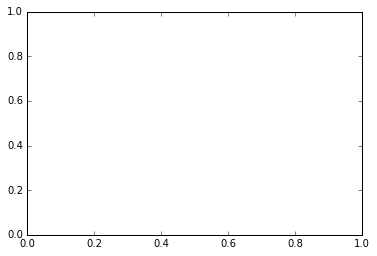

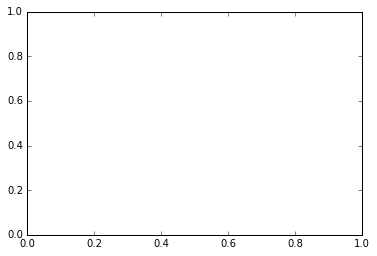

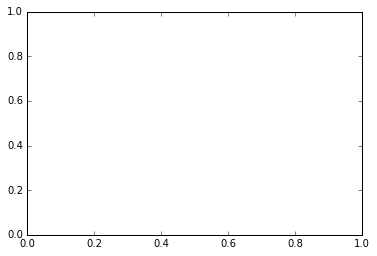

Q8DQM0




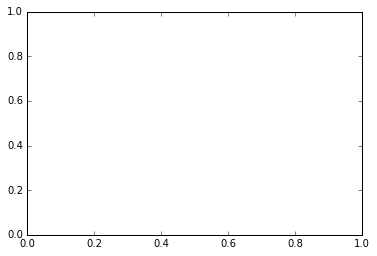

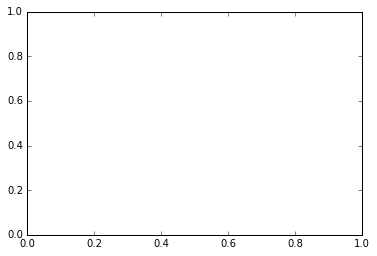

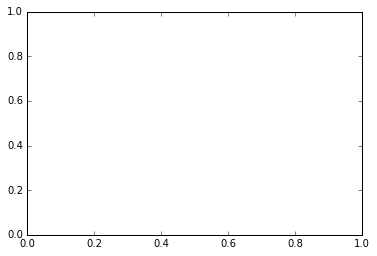

P64073

Q8DN05, Q8DPJ9, Q8DP18, Q8CWS6, Q8CYI8, P64063, Q8DNS0, Q8DQN2, P67685, Q8DQN5, Q8DQV2, P67283, Q8DPR4, Q8DPZ8, Q8DN70, P0A3C4, Q8DRI0, Q59947, Q8DPE3, Q8DNQ5, P64073, P63385, Q8DQQ0


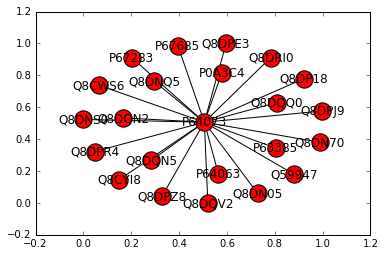

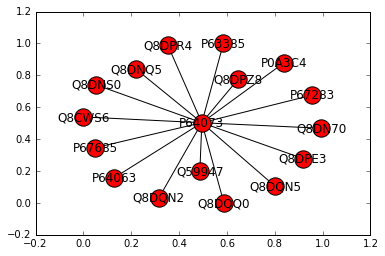

Q8CWS6, P64063, Q8DNS0, Q8DQN2, P67685, Q8DQN5, P67283, Q8DPR4, P0A3C4, Q8DN70, Q8DPZ8, Q8DPE3, Q59947, P64073, P63385, Q8DNQ5, Q8DQQ0


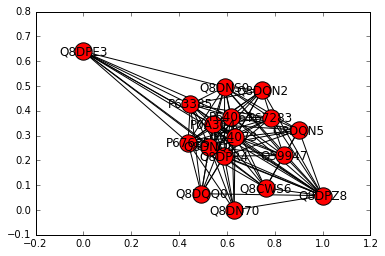

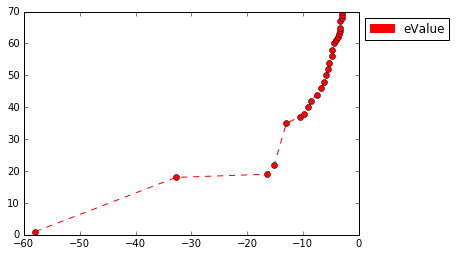

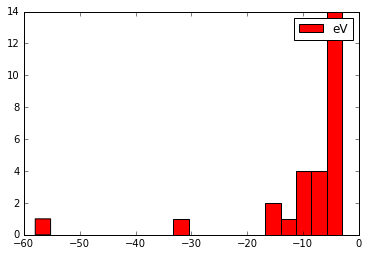

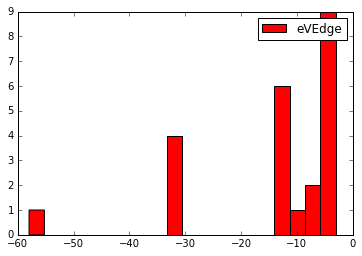

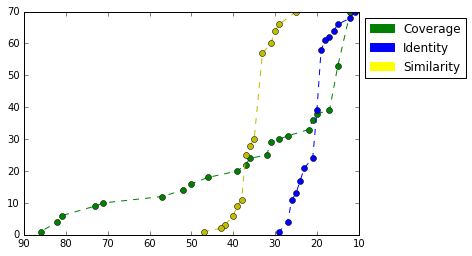

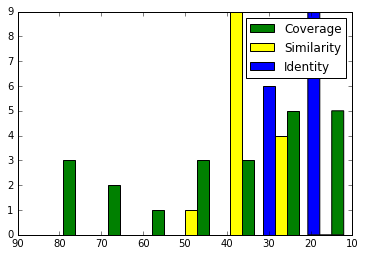

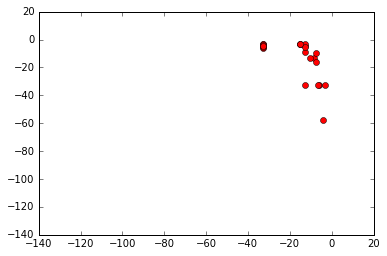

Q8DQE5

Q8DRL6, Q8DPL6, Q59947, Q8DPH8, Q8DN05, Q8DRI0, Q8DQN5, P0A2V9, P0A3R2, Q8DQV2, Q8CZ52, Q8DPJ9


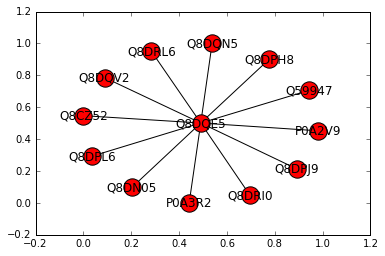

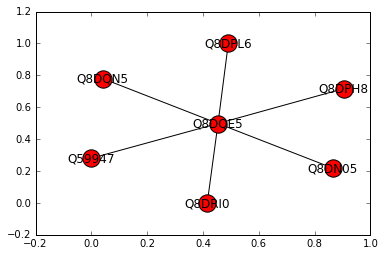

Q8DPL6, Q59947, Q8DPH8, Q8DN05, Q8DRI0, Q8DQE5, Q8DQN5


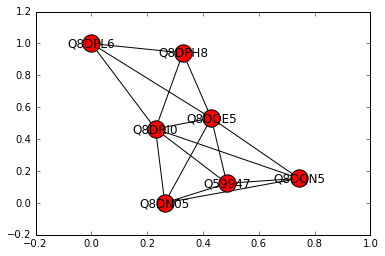

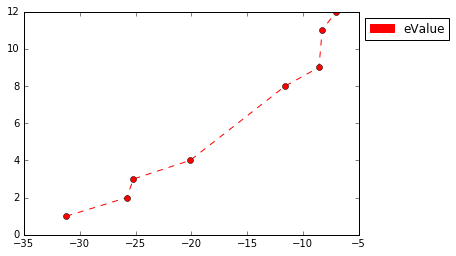

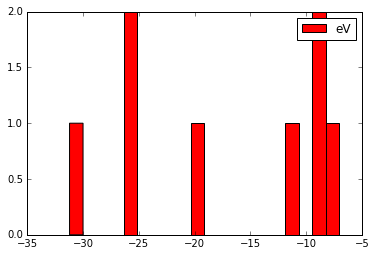

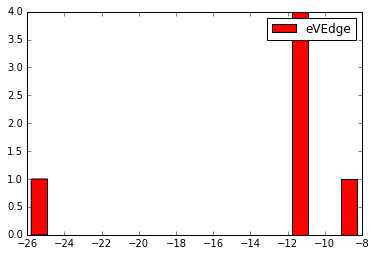

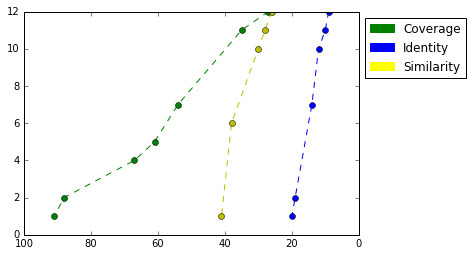

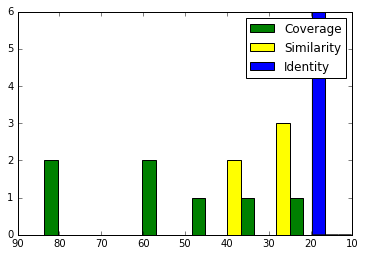

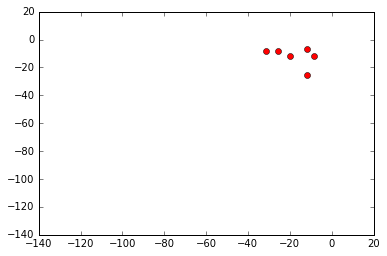

P64167

Q8DQV3, Q8DPJ9, Q8DPJ8, Q8DNS0


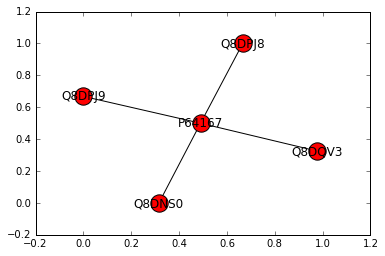

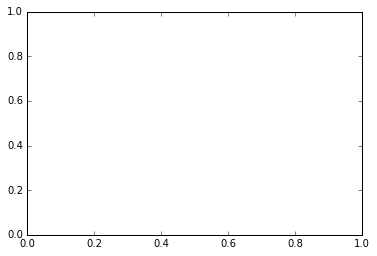

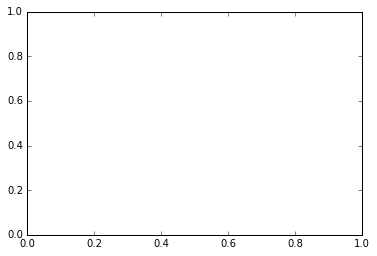

Q8DR70

Q8DPJ9, Q8DPN3


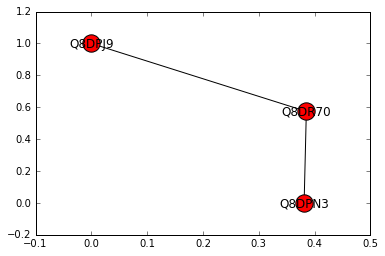

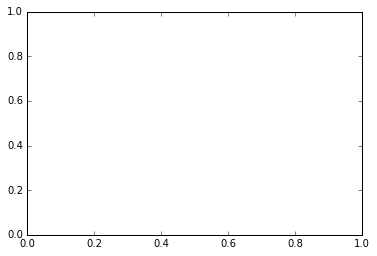

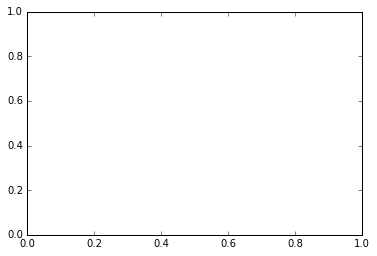

Q8DR57




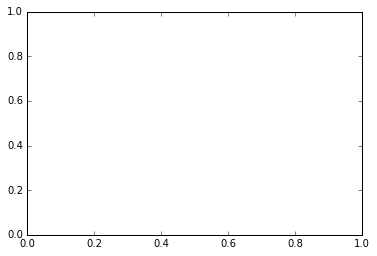

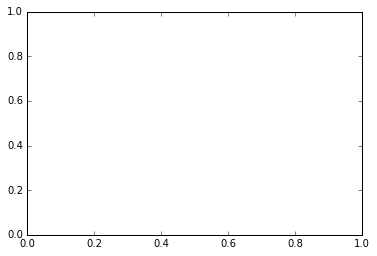

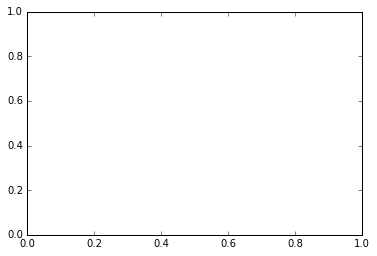

Q8DNE8




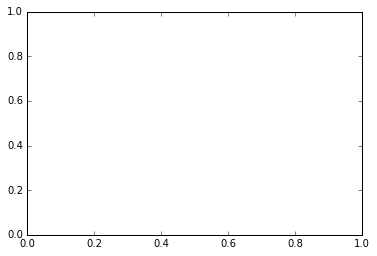

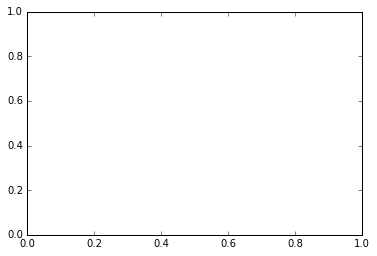

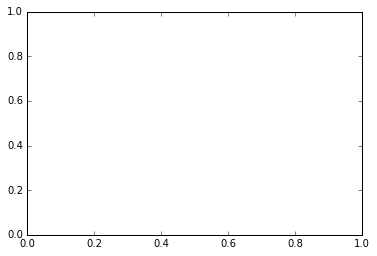

Q8DNI9




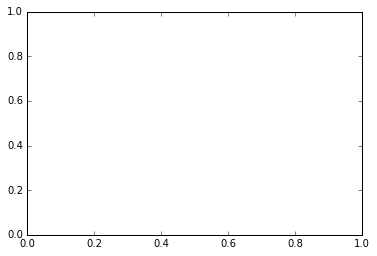

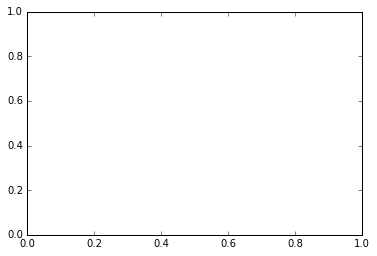

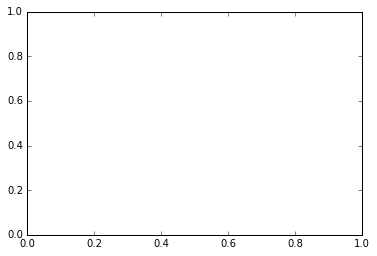

Q9EUQ7




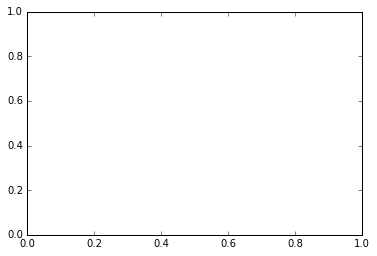

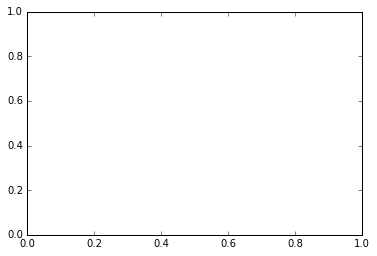

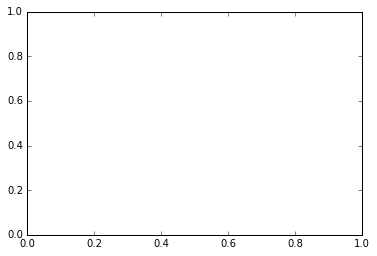

Q8DNS0

Q8DRL6, P0A4M6, P65833, Q8DQD7, Q8CWN6, Q8DMY4, Q8DQL5, P67414, Q8DNB9, Q8DP78, P59206, Q8DP20, Q59947, Q8DNS0, Q8DPH1, P65756, Q8DPH2, Q8DRD1, Q8DPK9, Q8CWR0, Q8DQT7, Q8DQT0, Q7CRB1, Q8DPZ3, Q8DQ08, Q8DPZ1, Q7CRA7, Q8DRK4, Q8DQR4, Q8DRK9, Q8DN38, Q8DNI7, Q8DPK5, Q8DNA2, Q8DP64, Q8DQM7, Q8DP62, Q8DPK2, Q8DNZ7, P66136, P0A4D8, Q8DNR5, Q8DQX8, Q8CM37, Q8DNR9, Q8DNR8, Q8DN42, Q8DR67, Q8DPS8, Q8DN46, Q8CZ52, Q8DPS6, Q8DPR4, Q8DR68, Q8CY62, Q8CWV3, P67331, Q8DRJ2, Q8DPB0, Q8DPB7, Q8DP13, Q8DQ59, Q8DPJ9, Q8DNY5, Q8CYG6, P63734, Q8CWN0, Q8CWU0, Q8DNQ5, Q8DMW2, Q8DRB1, Q8DRB0, Q8DN41, P0A2V9, Q8DNL0, Q8DNP4, Q8DPR0, Q8DRI6, Q8DPS9, Q8DRP1, Q8DNX4, Q8DRI9, Q8DQP4, Q8DRI7, Q8DRI0, Q8DRI1, Q8DNX8, Q8DP00, Q8DRA6, Q8DRA0, Q8DP04, Q8DQX6, Q8DQX9, Q8DQC7, Q8DPT2, Q8DRA8, Q8DPE3, Q8DQ38, Q8CWT3, Q8CWT2, Q8CWT1, Q8CWT0, Q8DQE9, Q8DRD9, Q8DNP9, Q8DRA5, Q8CWT8, Q8DNP1, Q8DQ21, Q8DP70, Q8DNH4, Q8DNH1, P64023, P66051, Q8DPS3, Q8DR41, Q8DN05, Q8DN00, Q8DNF9, P63545, Q8CZC0, Q8DP39, Q8DPQ8, Q8CZ85, 

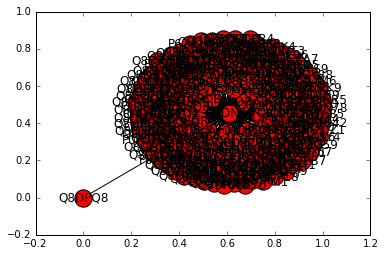

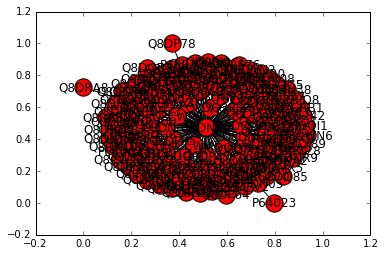

Q8DRL6, P0A4M6, P65833, Q8DQD7, Q8DQL5, P67414, Q8DP78, Q59947, Q8DNS0, P65756, Q8DPH2, Q8DRD1, Q8DPK9, Q8DQT7, Q8DQT0, Q7CRB1, Q8DPZ3, Q8DPZ1, Q7CRA7, Q8DRK9, Q8DN38, Q8DNI7, Q8DPK5, Q8DNA2, Q8DP64, Q8DP62, Q8DNZ7, P66136, P0A4D8, Q8DNR5, Q8DNR9, Q8DNR8, Q8DN42, Q8DR67, Q8DPS8, Q8DPS9, Q8CWV3, Q8DR68, Q8DPS3, P67331, Q8DPB0, Q8DPB7, Q8DP13, Q8DQ59, Q8DMX2, Q8DPJ9, Q8DNY5, P63734, Q8CWU0, Q8DNQ5, Q8DQF4, Q8CWN6, Q8DRB0, Q8DN41, Q8DNL0, Q8DPR0, Q8DPR4, Q8DRP1, Q8DRI9, Q8DRI6, Q8DNX8, Q8DRA0, Q8DP04, Q8DQX6, Q8DQX8, Q8DQC7, Q8DRA8, Q8DPS6, Q8DQ38, Q8CWT3, Q8CWT1, Q8CWT0, Q8DQE9, Q8DRD9, Q8DNP9, Q8DNP4, Q8DQ21, Q8DP70, Q8DNH4, P64023, P66051, Q8DR41, Q8DN05, P63545, Q8DPQ8, Q8CZ85, Q8DNF1, Q8DQC6, P64063, Q8DQH6, Q8DNE9, P0A336, Q8DP21, Q8DPG3, Q8DPG4, Q8DRG2, P64073, P62576, P0A3Y4, Q8DMZ1, Q8DQI1, Q8DN46, Q8DR29, Q8DNN2, Q8DQ84, Q8CWR0, P66855, Q8DP47, Q8DQQ8, P0A474, Q8DPF1, Q8DPF9, Q8DQ14, Q8DNU1, Q8CYK3, P59652, Q8DQN9, P61183, P67685, Q8DPN4, Q8CZ28, Q8DP50, Q8DQN5, Q8DQV2, P65240, 

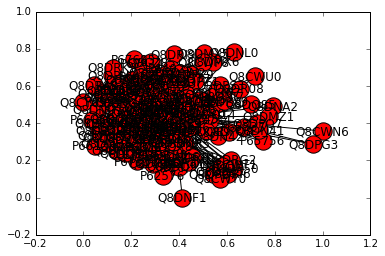

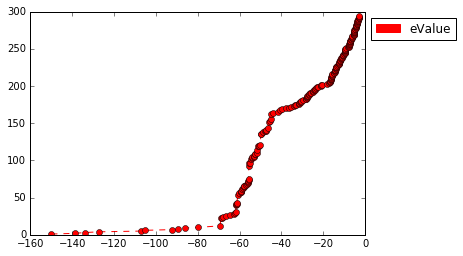

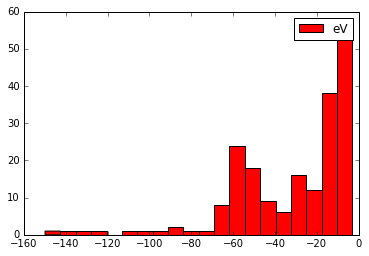

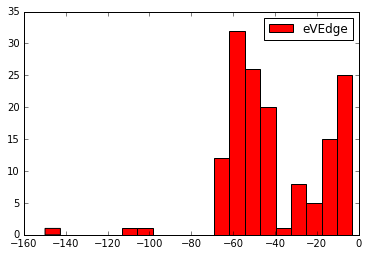

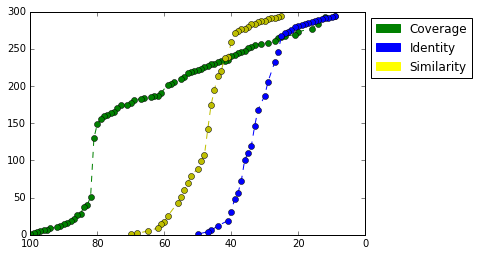

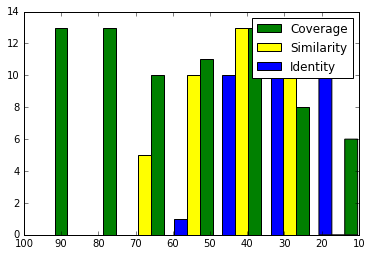

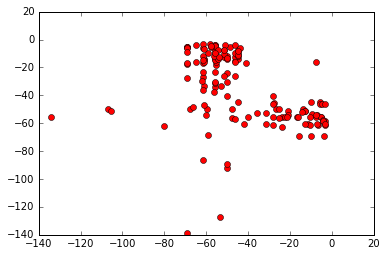

Q8DR29

Q8DRH7, Q8DQ50, Q8DQH0, Q8DQN9, Q59947, Q8DNS0, Q8DQN1, Q8DPL9, Q8DQV2, Q8CZ08, Q8DPV2, Q8DQG5, Q7CRA7, Q8DNX0, Q8DNE9, Q8DMX2, Q8DQR3, Q8DQ62, Q8CYJ1, Q8DQ61, Q8DQ40, Q8DQH6, Q8DNP9, Q8DP47, Q8DNR9, Q8DR29, Q8DNH1, Q8DR20


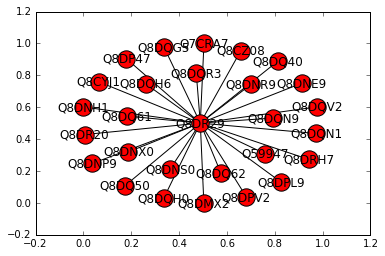

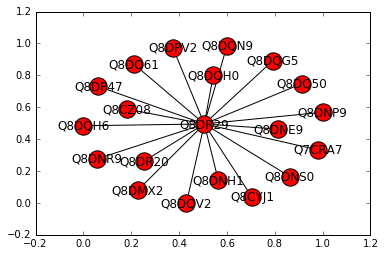

Q8DQ50, Q8DQH0, Q8DQN9, Q8DNS0, Q8DQV2, Q8CZ08, Q8DPV2, Q8DQG5, Q7CRA7, Q8DNE9, Q8DMX2, Q8CYJ1, Q8DQ61, Q8DQH6, Q8DNP9, Q8DP47, Q8DNR9, Q8DR29, Q8DNH1, Q8DR20


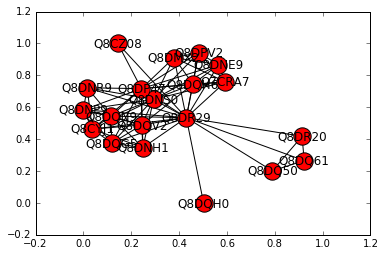

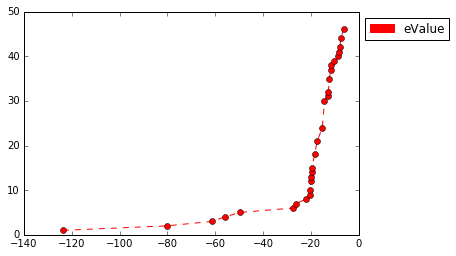

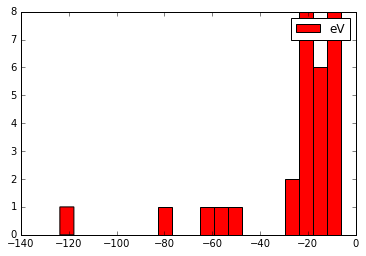

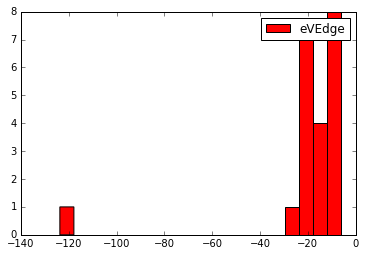

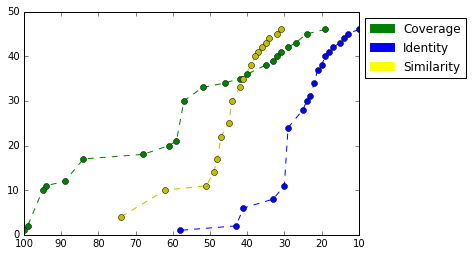

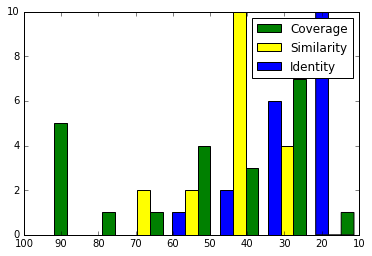

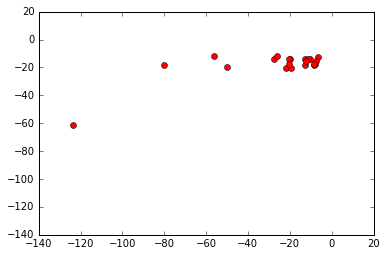

Q7ZAK7




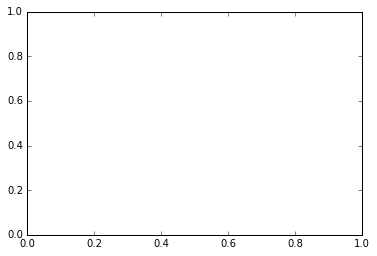

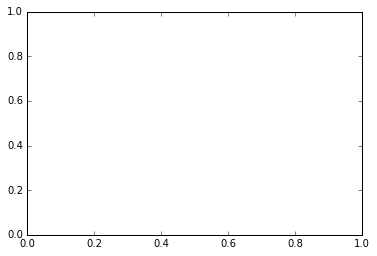

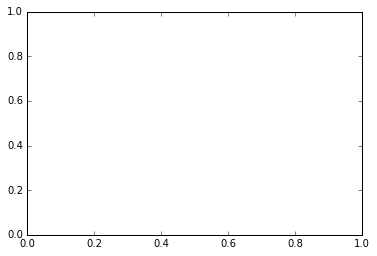

Q8DR55




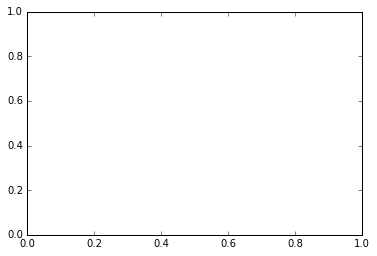

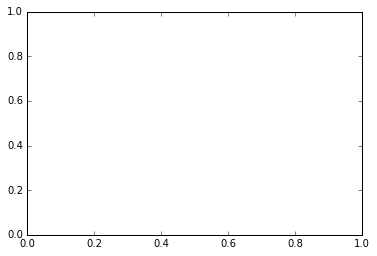

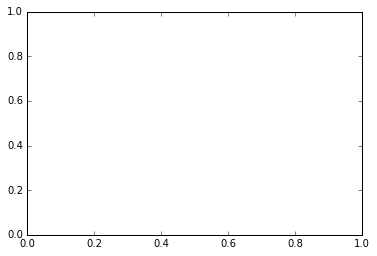

Q8DPV4




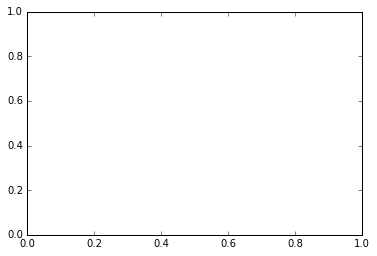

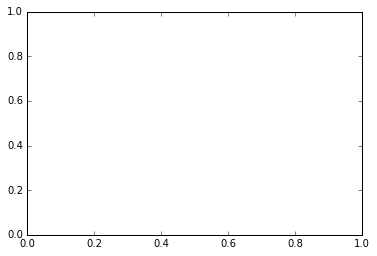

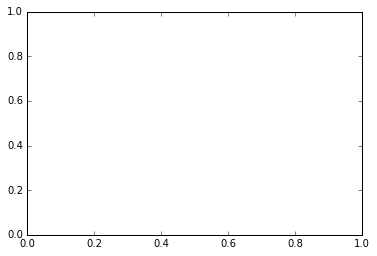

Q8DP40




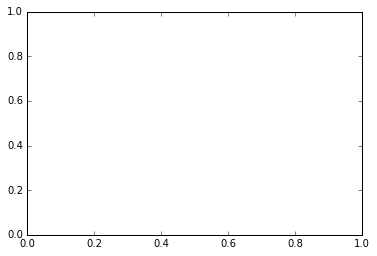

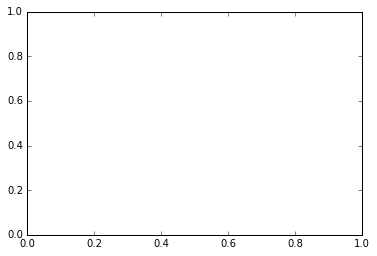

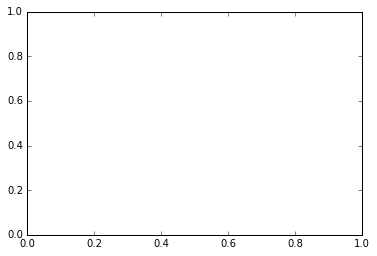

Q8DR69




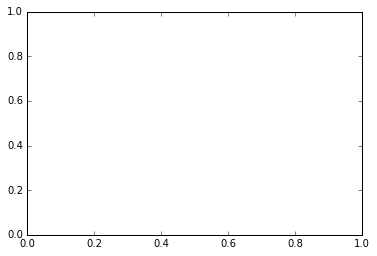

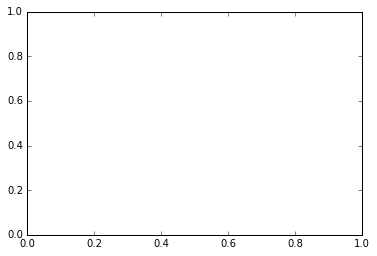

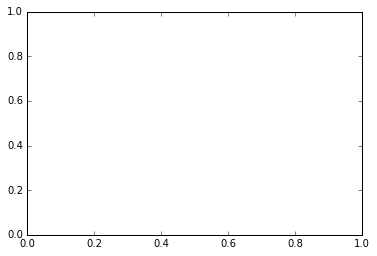

Q8CWQ5




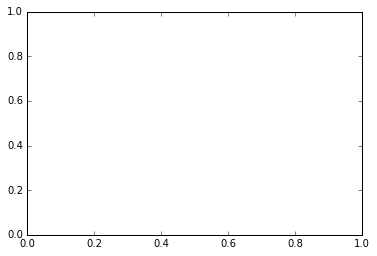

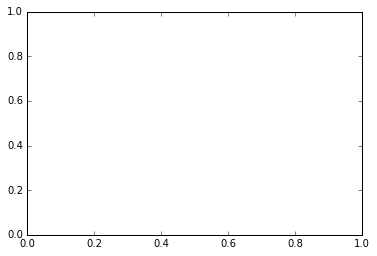

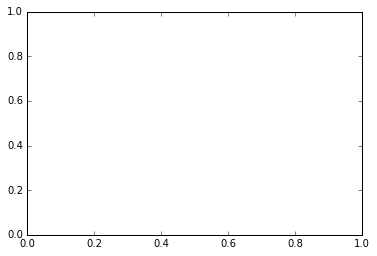

Q8DQM2




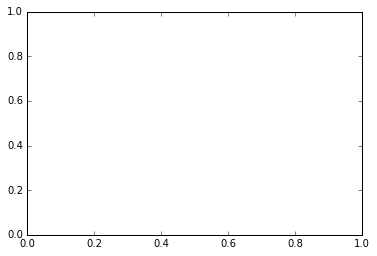

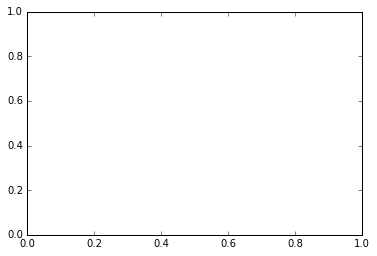

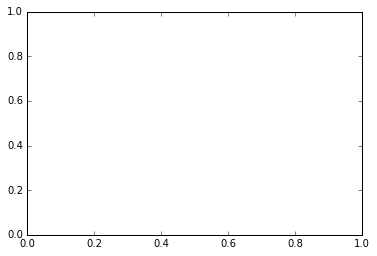

Q8DQM1

Q8DN78, Q8DQ25, Q8DRI0, Q8DQN5, Q8DP04, Q8DPJ9, P66836


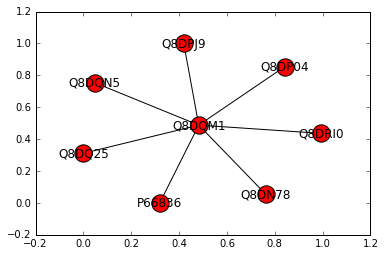

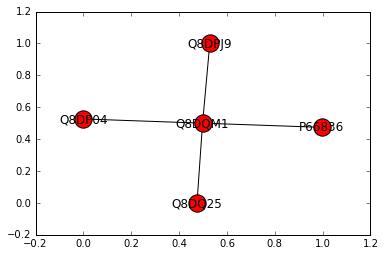

Q8DQ25, Q8DQM1, Q8DP04, Q8DPJ9, P66836


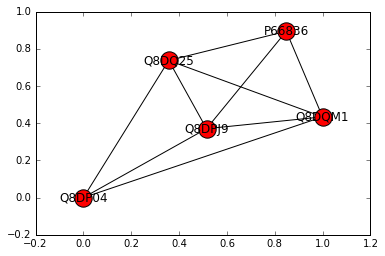

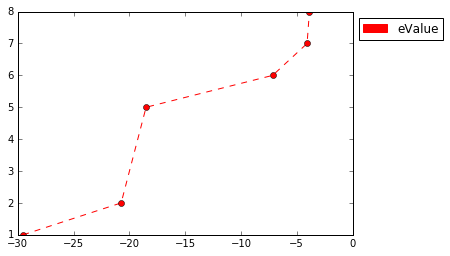

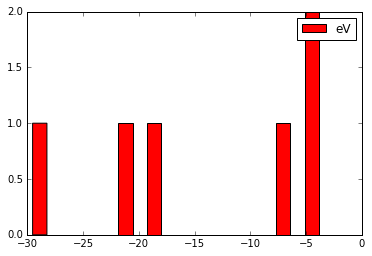

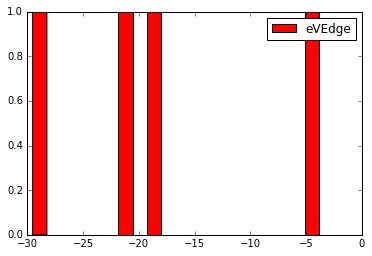

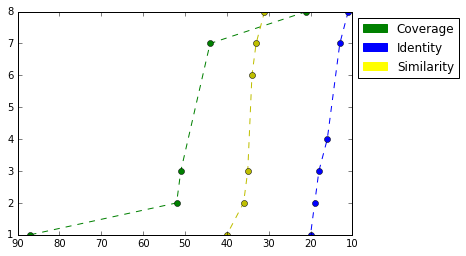

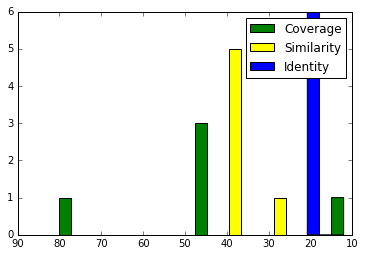

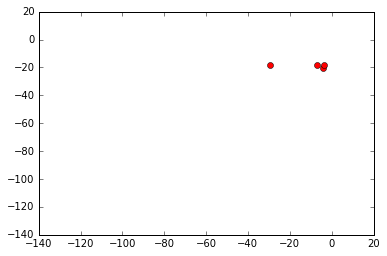

P65467

Q8DPM7, Q8DPJ9, Q8DRI0


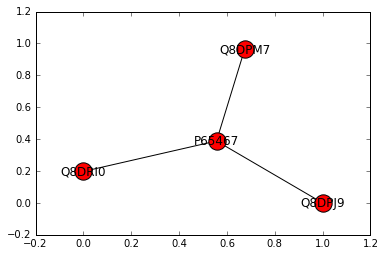

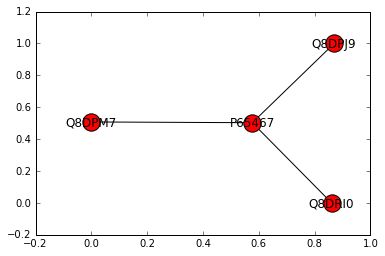

Q8DPM7, Q8DPJ9, Q8DRI0, P65467


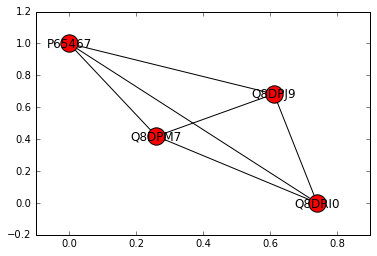

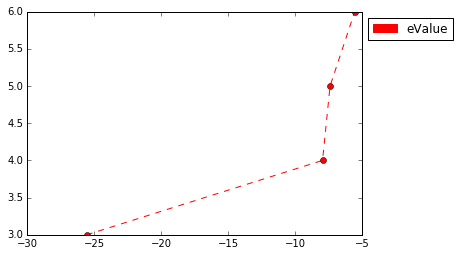

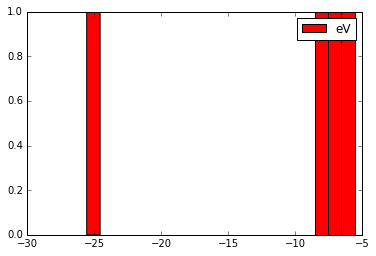

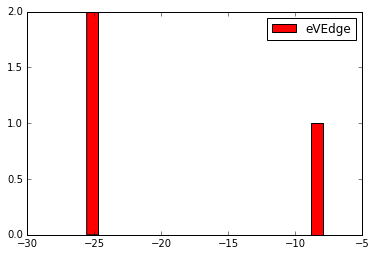

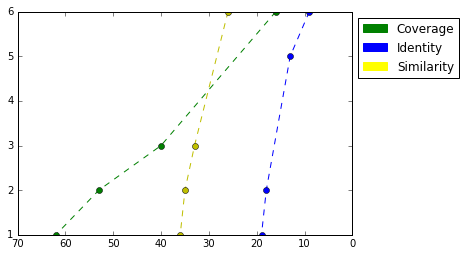

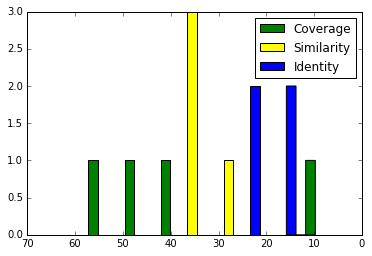

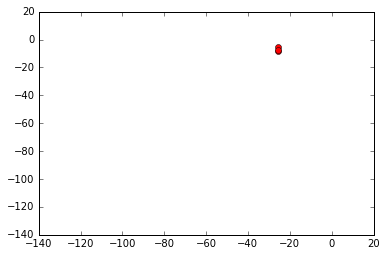

P59676

Q8DRL6, Q8CYI8, Q59947, Q8DN05, Q8DRI0, Q8DQN5, Q8CWR4, Q8CYJ8


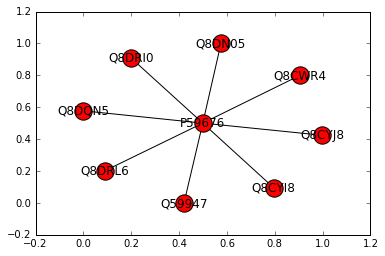

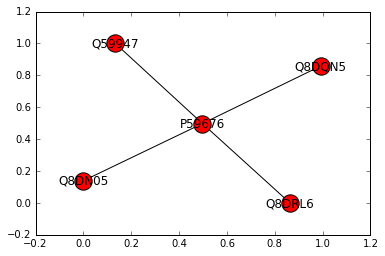

Q8DRL6, Q59947, P59676, Q8DN05, Q8DQN5


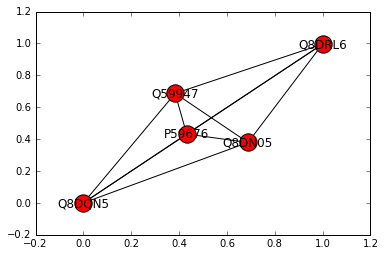

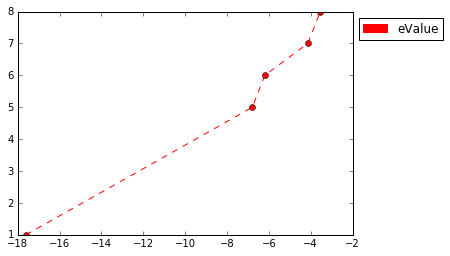

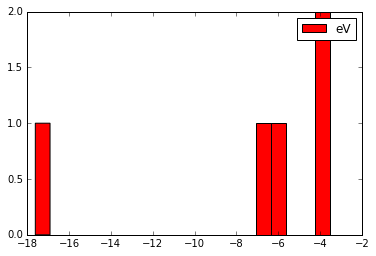

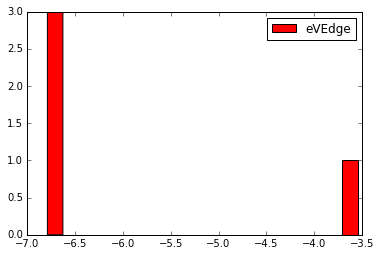

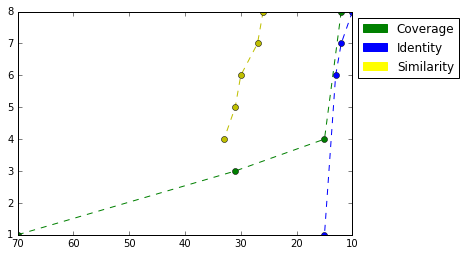

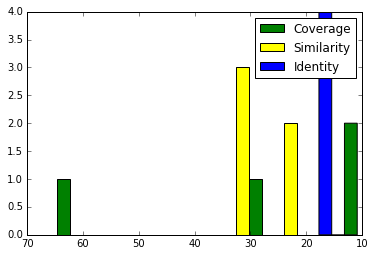

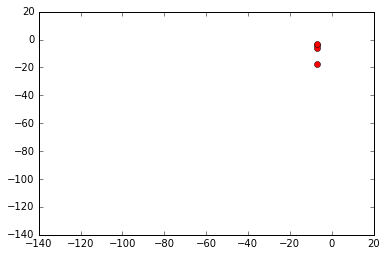

Q8DPW6




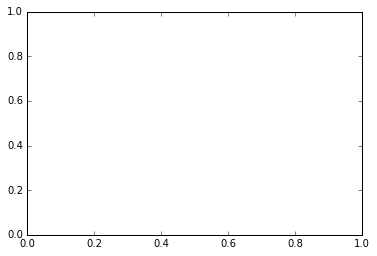

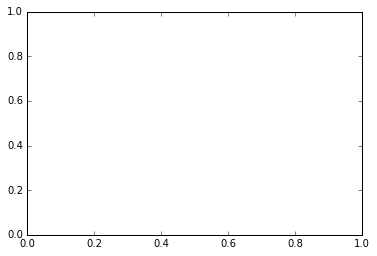

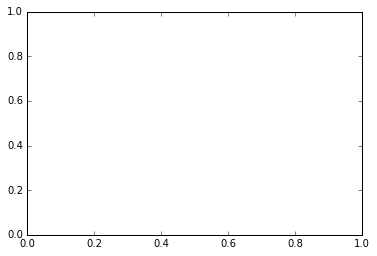

Q8DQH3




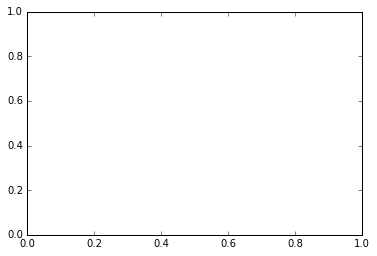

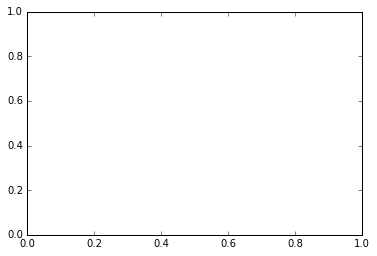

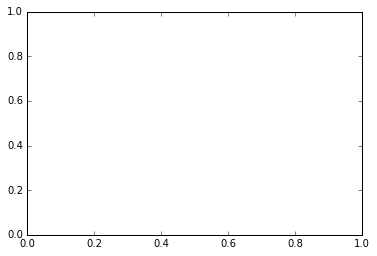

Q8DNV6




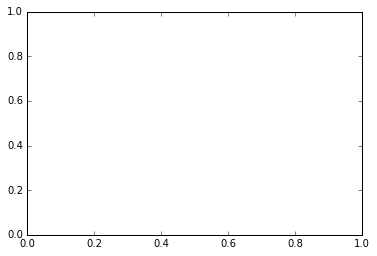

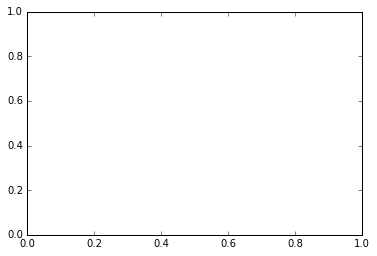

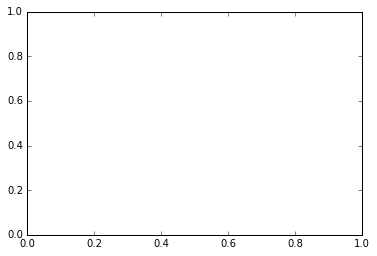

Q8DQH4

Q8DNZ7, Q8DRE4, Q8DPV1


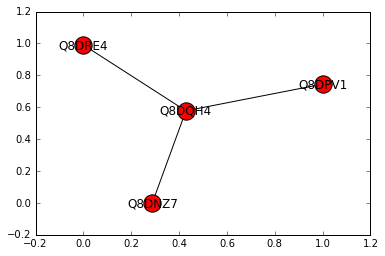

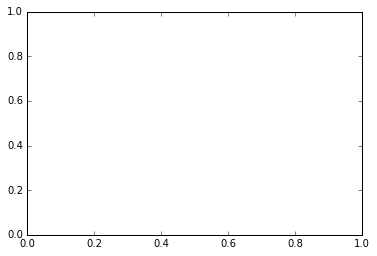

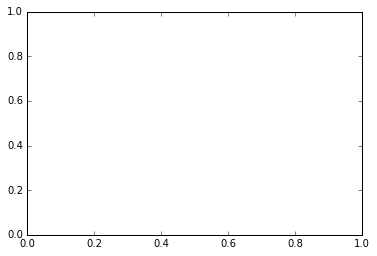

Q8DNV8

Q8DRL6, P0A452, Q8DPW9, Q8DRH2, Q8DN05, Q8DMY4, Q8DQS9, Q8DPJ9, P66709, Q8DQ18, Q8CYI8, Q59947, Q8DNS0, Q8DQN3, Q8DQN5, Q8DN54, P0A3R2, P67283, Q8CYS5, Q8DMZ2, Q8DRP0, Q8DN16, Q8DRI0, Q8DRA5, Q8CWT3, Q8DNV8, Q8DP45, Q8DNV3, P63743, P59653, Q8DPS8, Q8DP47


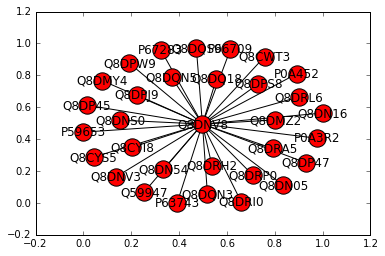

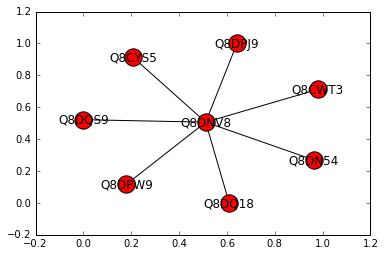

Q8DPW9, Q8DQS9, Q8DPJ9, Q8DQ18, Q8DN54, Q8CYS5, Q8CWT3, Q8DNV8


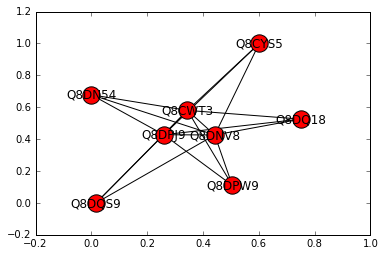

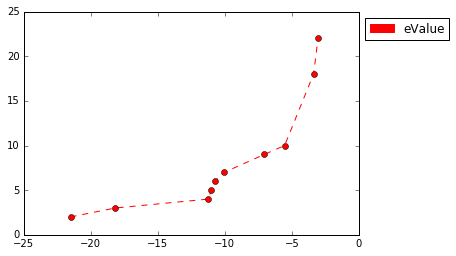

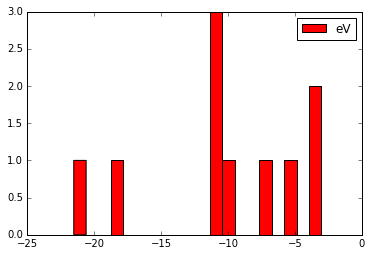

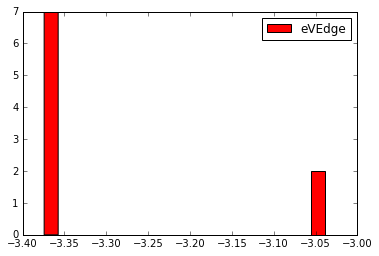

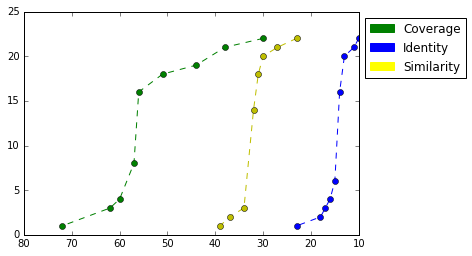

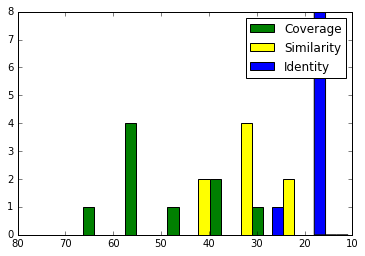

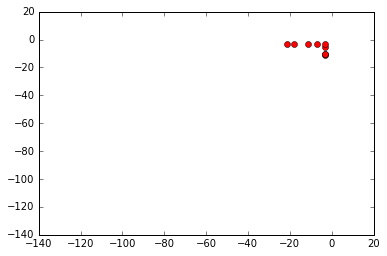

Q8DQE8




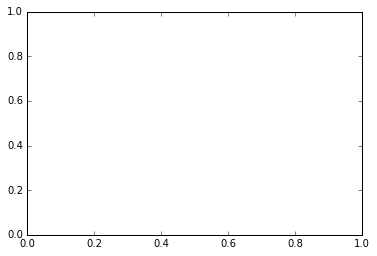

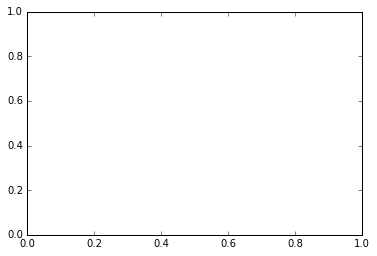

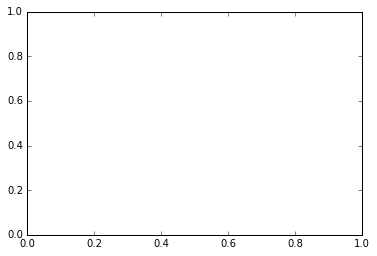

Q8CZ65




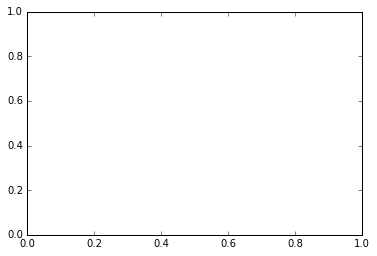

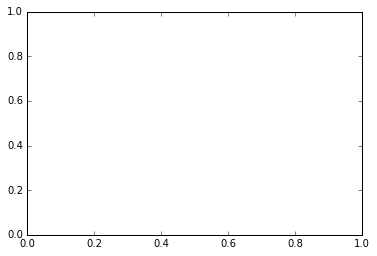

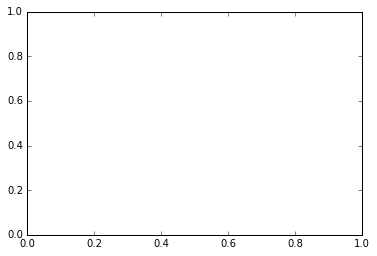

Q8DPK2

Q8DRQ4, Q8DRL6, Q8CYI8, Q8DP20, Q8DNS0, Q8DPH1, Q8DP47, Q8DNY2, Q8DQN5, Q8DQV2, Q8DQJ5, Q8DPS9, Q8DPK2, Q8DRN7, P59652, Q8DN59, Q8DN05, Q8DQY0


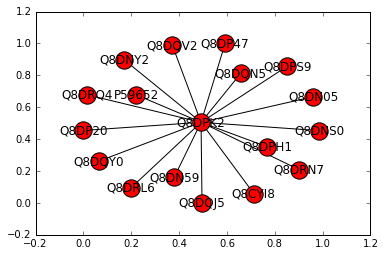

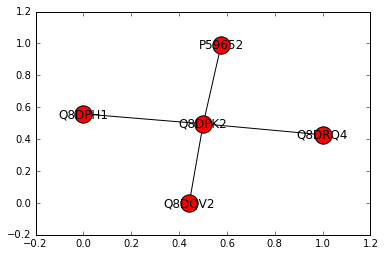

Q8DRQ4, Q8DPH1, Q8DQV2, Q8DPK2, P59652


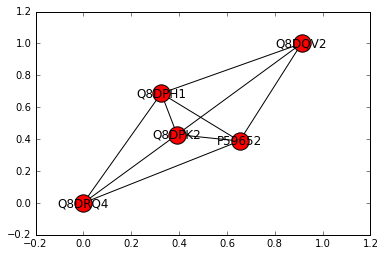

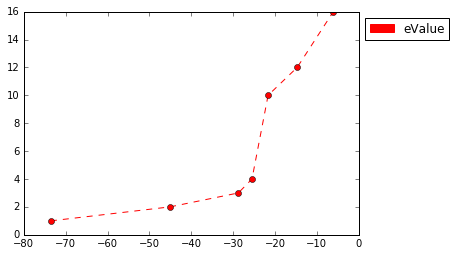

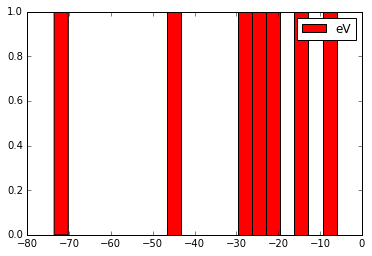

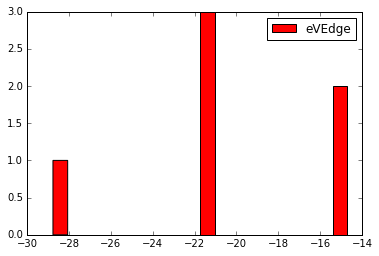

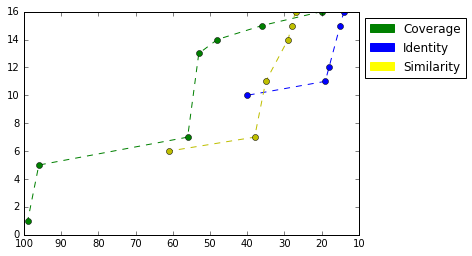

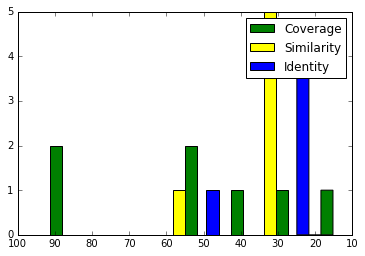

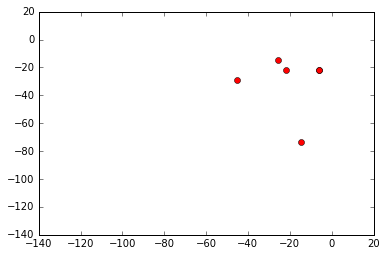

Q8DNV9

Q8DQG0, Q8DN05, Q8DN00, Q8DP13, Q8DNY5, Q8DPD2, Q8DP78, Q8DNV9, Q8CYI8, Q59947, Q8DQH6, Q8DMW2, P65537, Q8DQN5, Q8DQV2, Q8DPR0, Q8DR03, Q8DRI9, Q8DRK4, Q8DRI0, Q8DP00, Q8DP04, Q8DP20, P66836, Q8DNR5, Q8CWT2, Q8DNU5, Q8DQ25, Q8DP70


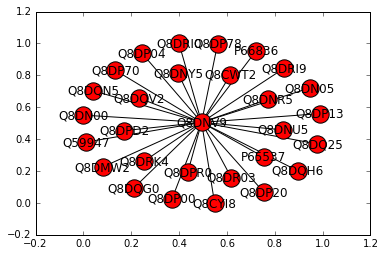

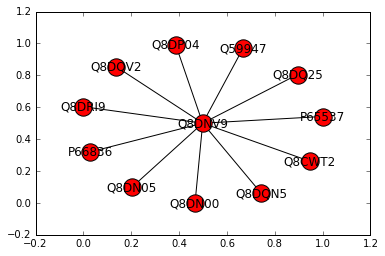

Q8DN05, Q8DN00, Q8DNV9, Q59947, P65537, Q8DQN5, Q8DQV2, Q8DRI9, Q8DP04, P66836, Q8CWT2, Q8DQ25


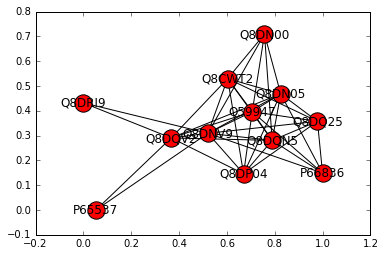

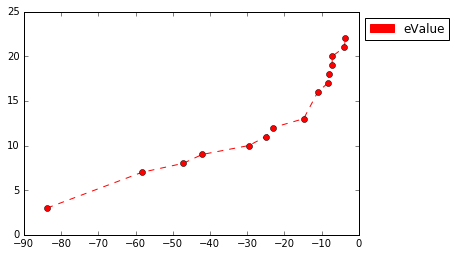

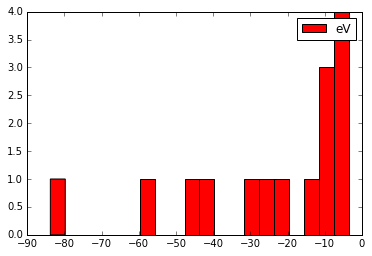

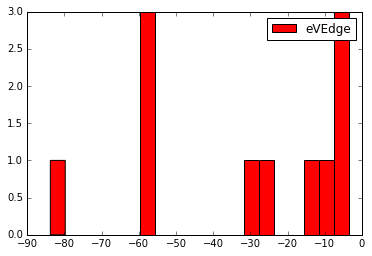

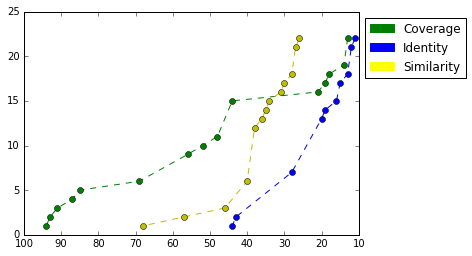

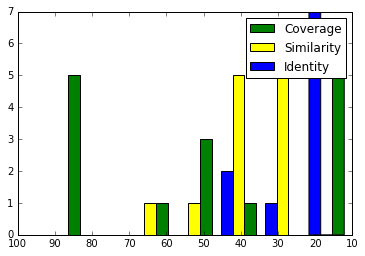

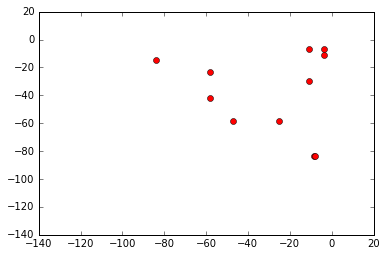

In [36]:
#range_list = np.linspace(float(2.51425e-20), float(2.51425e-02))
#print range_list
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 40
#fig_size[1] = 40
#plt.rcParams["figure.figsize"] = fig_size

#test = interactome.deserializeGraph("/Users/mbachir/Desktop/omegaLoMo/testGraph/Q8DR55.json")
#idList = ["Q8DR55", "Q8DR57", "Q8CZ65", "Q8CWP9"]
idList = ["Q8DR55"]
op = graph.dataOperations(interactome.queryTopo)

for idR6 in onlyId:
    print idR6 + '\n'
    premierVoisin = interactome.createNeiGraph(idR6, init, True)
    generateNeighboor = premierVoisin.generateNeighboorGraph
    #print premierVoisin.graphData.adj
    print ', '.join([pv for pv in premierVoisin.neighborsList])
       
    nx.draw_networkx(premierVoisin.graphData, with_labels = True)
    plt.show()
    #graphToModel = gm.GraphToModel(premierVoisin) 
    #graphToModel.fetch_homologues("/Users/mbachir/Desktop/fastaGraph/")
    #graphToModel.fastaFromNodes()
    #premierVoisin = op.deserializeGraph("/Users/mbachir/Desktop/serialGraph/"+idR6+".json")
    #op.serializeGraph(premierVoisin, "/Users/mbachir/Desktop/serialGraph/"+idR6+".json")
    #connectedGraph = premierVoisin.connectNeighboor(premierVoisin)
    
    filtre = interactome.filterGraph(premierVoisin, evalue = 0.001)
    connectedGraph = premierVoisin.connectNeighboor(filtre)

    stats = interactome.drawCurveParam(filtre)


In [25]:
allIdHomoMassida = []
allIdHomoMassidaTry = []

for idR6 in massEtPino:
    #print idR6 + '\n'
    premierVoisin = interactome.createNeiGraph(idR6, init, False)

    allIdHomoMassidaTry.append([pv for pv in premierVoisin.neighborsList])

    for fn in premierVoisin.neighborsList:
        allIdHomoMassida.append(fn)
        
        
counterMassida = dict((i, allIdHomoMassida.count(i)) for i in allIdHomoMassida)

In [26]:
print Counter(allIdHomoMassida)

Counter({u'Q8DN05': 18, u'Q8DRI0': 17, u'Q8DQN5': 16, u'P67283': 16, u'Q59947': 15, u'Q8DNS0': 15, u'Q8CYI8': 14, u'Q8DPJ9': 14, u'Q8CYG6': 14, u'Q8DNY7': 13, u'Q8CWT3': 13, u'Q8DRL6': 13, u'Q8DPD9': 13, u'P59652': 12, u'Q8DMY4': 11, u'Q8DPK4': 11, u'Q8DMW7': 11, u'Q8DQM0': 11, u'Q8DNQ7': 11, u'Q8DNI6': 10, u'Q8DQU0': 10, u'Q8DR32': 10, u'Q8DR34': 10, u'Q8DNV8': 10, u'Q8DND8': 10, u'Q8DR86': 10, u'Q8DP47': 10, u'Q8DNU7': 10, u'Q8DQP6': 10, u'Q8DN96': 10, u'Q8DQ95': 10, u'Q8DNS8': 10, u'Q8DN39': 10, u'Q8DPS8': 10, u'Q8DPS6': 10, u'Q8DQH6': 10, u'Q8DPY4': 10, u'Q8DPV2': 10, u'Q8DMW2': 9, u'Q8DMW9': 9, u'Q7CRB5': 9, u'Q8DQI9': 9, u'Q8DQV2': 9, u'Q8DNC0': 9, u'Q8DNK4': 9, u'Q8DNP9': 9, u'Q8CYV5': 9, u'Q8DMX2': 9, u'P59206': 8, u'Q8DPK2': 8, u'Q8DPK9': 8, u'Q8DNV9': 8, u'Q8DPQ1': 8, u'Q8DQD4': 8, u'Q8DPT2': 8, u'Q8DQX7': 8, u'Q8DPM7': 8, u'Q8DPM1': 8, u'Q8DQN9': 8, u'P0A3M6': 8, u'Q8DQP8': 8, u'Q8DQP9': 8, u'Q8CZC0': 8, u'Q8CYK3': 8, u'Q8DNT2': 8, u'Q8DNS1': 8, u'Q8DN38': 8, u'Q8DQH4': 8, u

In [27]:
eVFiltre = 1e-30
concatInfo = {}

for idR6 in massEtPino:
    premierVoisin = interactome.createNeiGraph(idR6, init, False)
    for fn in premierVoisin.neighborsList:
        params = premierVoisin.getEdgeInformation(fn)
        if float(params[4]) != 0.0:
            #print idR6, fn, params
            if float(params[4]) < float(eVFiltre) and float(params[4]) < float(eVFiltre):
                if fn in counterMassida:
                    if fn not in concatInfo:
                        concatInfo.update({fn : [(counterMassida[fn], 
                                                  float(params[4]),
                                                  interactome.coverageCalculation(params[0], params[1], params[8]),
                                                  interactome.simiCalculation(params[0], params[1], params[2]),
                                                  interactome.idCalculation(params[0], params[1], params[3]))]})
                    else : 
                        concatInfo[fn].append(((counterMassida[fn], 
                                                float(params[4]),
                                                interactome.coverageCalculation(params[0], params[1], params[8]),
                                                interactome.simiCalculation(params[0], params[1], params[2]),
                                                interactome.idCalculation(params[0], params[1], params[3]))))

                                          
for infos in concatInfo:
    concatInfo[infos].append(len(concatInfo[infos]))

In [28]:
getHighMassidaSc = {}
for i in concatInfo:
    getHighMassidaSc.update({i : concatInfo[i][-1]})
sortedMassida = sorted(getHighMassidaSc.items(), key=operator.itemgetter(1), reverse = True)



In [29]:
for i in concatInfo:
    print i, concatInfo[i]

Q8CY88 [(1, 1.33239e-58, 96, 35, 16), 1]
Q8DMY9 [(1, 5.18204e-60, 38, 44, 23), 1]
Q8DMY8 [(3, 2.48883e-52, 40, 45, 27), 1]
Q8DP11 [(1, 7.12785e-61, 98, 45, 25), 1]
Q8DMY2 [(5, 1.23272e-41, 97, 52, 25), 1]
Q8DMY6 [(2, 1.94432e-53, 39, 42, 20), 1]
Q8CYT3 [(3, 1.66549e-61, 54, 33, 19), 1]
P63589 [(1, 1.84941e-65, 99, 40, 16), 1]
P67414 [(4, 1.34019e-50, 98, 48, 23), 1]
P66908 [(1, 4.50682e-95, 96, 69, 53), 1]
Q8DQL1 [(4, 1.21007e-83, 95, 54, 30), (4, 3.55871e-49, 36, 31, 16), 2]
Q8DNB2 [(1, 6.36211e-60, 92, 56, 40), 1]
Q8DQ79 [(4, 1.20418e-133, 99, 61, 43), (4, 2.49486e-35, 91, 39, 21), 2]
Q8DNB9 [(2, 1.47707e-57, 68, 29, 15), 1]
Q8DNB8 [(2, 1.36331e-40, 94, 57, 34), (2, 1.36331e-40, 94, 57, 34), 2]
Q8DRL2 [(1, 2.77301e-56, 38, 43, 24), 1]
Q8DP78 [(5, 1.67277e-54, 68, 35, 19), 1]
P59206 [(8, 1.75476e-84, 94, 67, 53), (8, 1.53646e-69, 98, 55, 36), (8, 1.66549e-61, 54, 33, 19), 3]
Q8CYM2 [(2, 2.2638e-40, 91, 43, 26), (2, 2.2638e-40, 91, 43, 26), 2]
Q8CYM3 [(1, 1.66549e-61, 54, 33, 19), 1]
Q

TypeError: list indices must be integers, not str

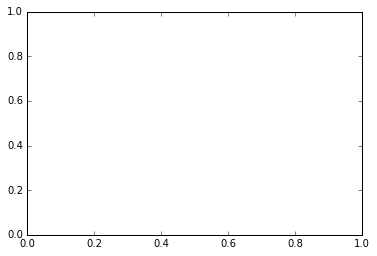

In [31]:
#nopnopnop
eVFiltre = 1e-10
concatInfo = {}
for idR6 in massEtPino:
    premierVoisin = interactome.createNeiGraph(idR6, init, True)
    for fn in premierVoisin.neighborsList:
        params = premierVoisin.getEdgeInformation(fn)
        hsp_nb = len(params["lowQueryParam"])
        for nb in range(hsp_nb) :
            if float(params["lowQueryParam"][nb][4]) < float(eVFiltre) and float(params["highQueryParam"][nb][4]) < float(eVFiltre):
                #print fn, params
                if params["lowQueryParam"][nb][4] < params["highQueryParam"][nb][4]:
                    if fn in counterMassida:
                        if fn not in concatInfo:
                            concatInfo.update({fn : [(counterMassida[fn], 
                                                      float(params["highQueryParam"][nb][4]),
                                                      interactome.coverageCalculation(params["highQueryParam"][nb][0], params["highQueryParam"][nb][1], params["highQueryParam"][nb][8]),
                                                      interactome.idCalculation(params["highQueryParam"][nb][0], params["highQueryParam"][nb][1], params["highQueryParam"][nb][3]),
                                                      interactome.simiCalculation(params["highQueryParam"][nb][0], params["highQueryParam"][nb][1], params["highQueryParam"][nb][2]))]})
                        else : 
                            concatInfo[fn].append((counterMassida[fn],
                                                   float(params["highQueryParam"][nb][4]),
                                                   interactome.coverageCalculation(params["highQueryParam"][nb][0], params["highQueryParam"][nb][1], params["highQueryParam"][nb][8]),
                                                   interactome.idCalculation(params["highQueryParam"][nb][0], params["highQueryParam"][nb][1], params["highQueryParam"][nb][3]),
                                                   interactome.simiCalculation(params["highQueryParam"][nb][0], params["highQueryParam"][nb][1], params["highQueryParam"][nb][2])))
                else :
                    if fn in counterMassida:
                        if fn not in concatInfo:
                            concatInfo.update({fn : [(counterMassida[fn], 
                                                      float(params["lowQueryParam"][nb][4]),
                                                      interactome.coverageCalculation(params["lowQueryParam"][nb][0], params["lowQueryParam"][nb][1], params["lowQueryParam"][nb][8]),
                                                      interactome.idCalculation(params["lowQueryParam"][nb][0], params["lowQueryParam"][nb][1], params["lowQueryParam"][nb][3]),
                                                      interactome.simiCalculation(params["lowQueryParam"][nb][0], params["lowQueryParam"][nb][1], params["lowQueryParam"][nb][2]))]})
                        else : 
                            concatInfo[fn].append((counterMassida[fn],
                                                   float(params["lowQueryParam"][nb][4]),
                                                   interactome.coverageCalculation(params["lowQueryParam"][nb][0], params["lowQueryParam"][nb][1], params["lowQueryParam"][nb][8]),
                                                   interactome.idCalculation(params["lowQueryParam"][nb][0], params["lowQueryParam"][nb][1], params["lowQueryParam"][nb][3]),
                                                   interactome.simiCalculation(params["lowQueryParam"][nb][0], params["lowQueryParam"][nb][1], params["lowQueryParam"][nb][2])))

            else :
                print nb
                print fn, params["lowQueryParam"][nb], params["highQueryParam"][nb]
for infos in concatInfo:
    concatInfo[infos].append(len(concatInfo[infos]))